In [196]:
import numpy as np
import pandas as pd
import plotly.express as plx
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import missingno as  msno
import os

In [197]:
data=pd.read_csv('sales_data.csv')

In [198]:
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [199]:
data.columns

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [201]:
data.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [202]:
data.isna().any()

date        False
product     False
category    False
price        True
quantity     True
revenue      True
dtype: bool

<Axes: >

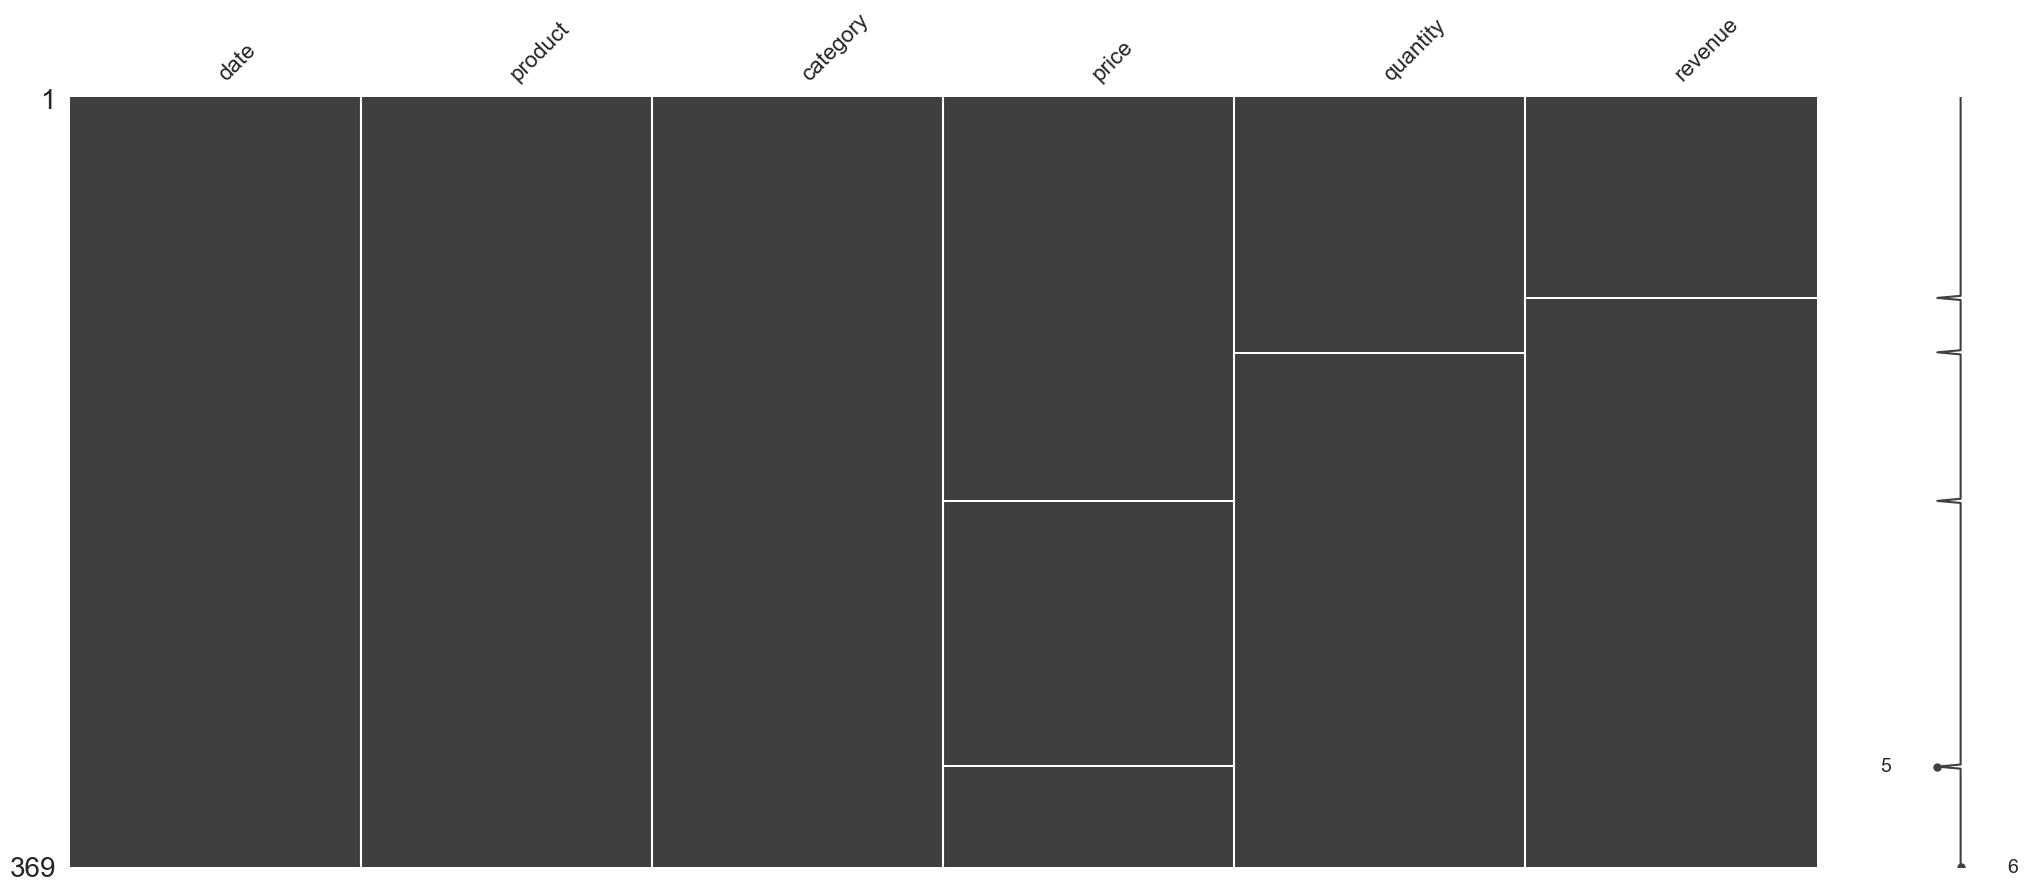

In [203]:
#find missing valz
msno.matrix(data)

<Axes: >

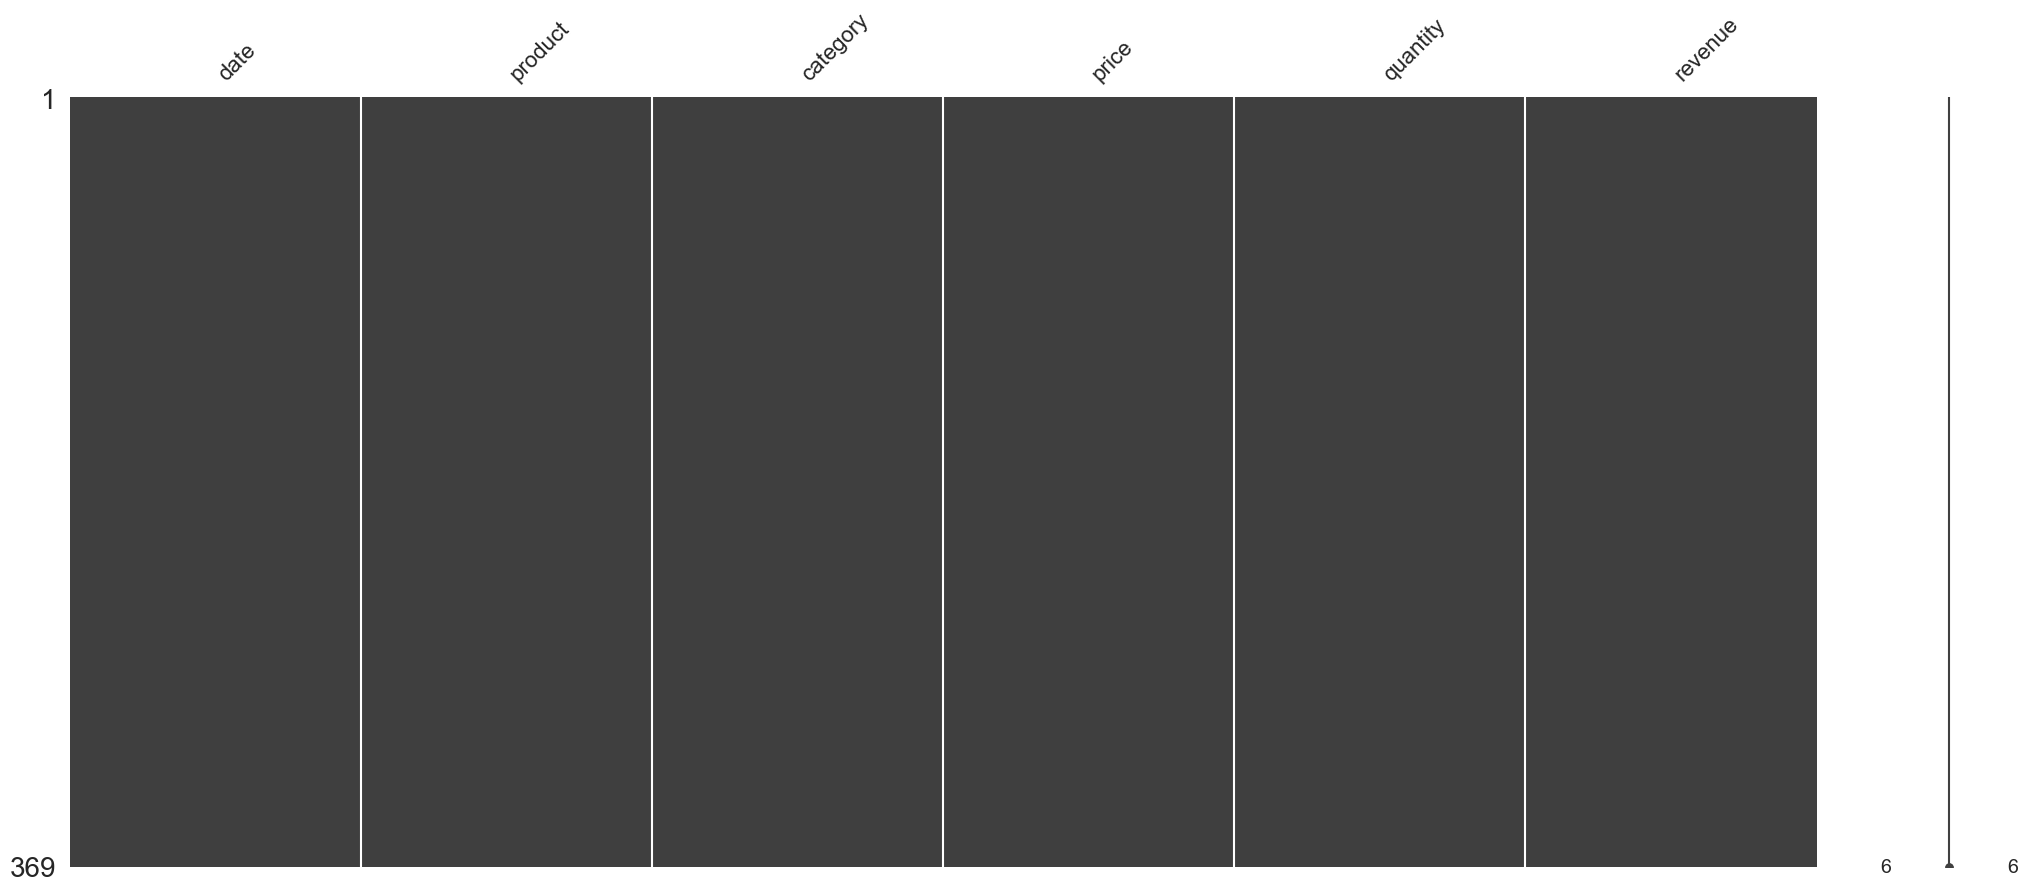

In [204]:
data = data.fillna(value=0)
msno.matrix(data)

In [205]:
duplicate_summary = {col: data[col].duplicated().any() for col in data.columns}
duplicate_summary 


{'date': True,
 'product': True,
 'category': True,
 'price': True,
 'quantity': True,
 'revenue': True}

In [206]:
data['date'].duplicated().sum()


4

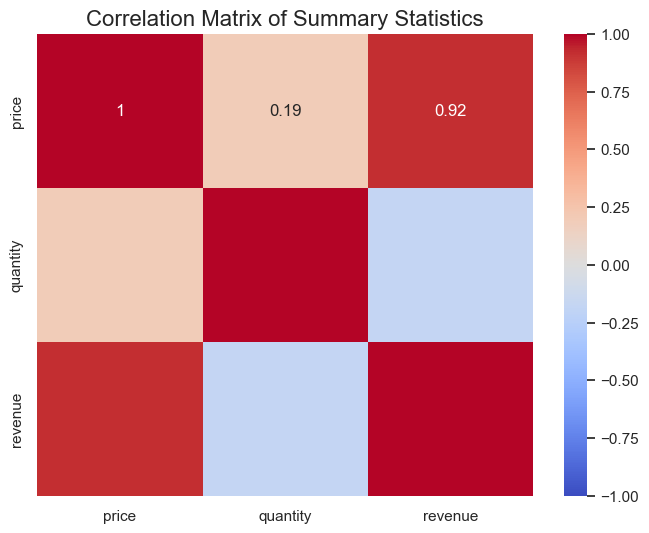

In [207]:
# Exclude non-numeric columns from describe()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
summary_stats = data[numeric_columns].describe()

# Calculate correlation matrix
corr_matrix = summary_stats.corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix of Summary Statistics', fontsize=16)

# Show plot
plt.show()

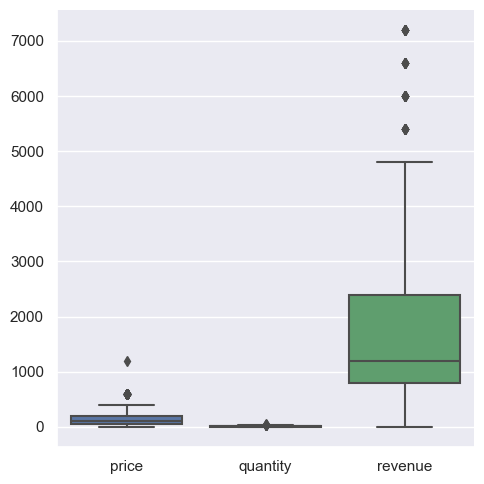

In [208]:
x=sns.catplot( data=data, kind='box')

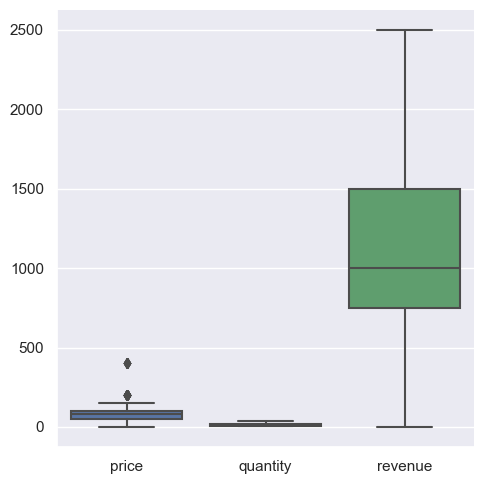

In [209]:

data[['price', 'quantity', 'revenue']] = data[['price', 'quantity', 'revenue']].astype(float)

# Set the figure size
sns.set(rc={'figure.figsize': (10, 8)})

# Calculate and set the whiskers to remove outliers
Q1 = data[['price', 'quantity', 'revenue']].quantile(0.25)
Q3 = data[['price', 'quantity', 'revenue']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[
    (data['price'] >= lower_bound['price']) & (data['price'] <= upper_bound['price']) &
    (data['quantity'] >= lower_bound['quantity']) & (data['quantity'] <= upper_bound['quantity']) &
    (data['revenue'] >= lower_bound['revenue']) & (data['revenue'] <= upper_bound['revenue'])
]
data=filtered_data
# Create a boxplot using catplot with kind='box'
x = sns.catplot(data=filtered_data, kind='box')

# Show the plot
plt.show()

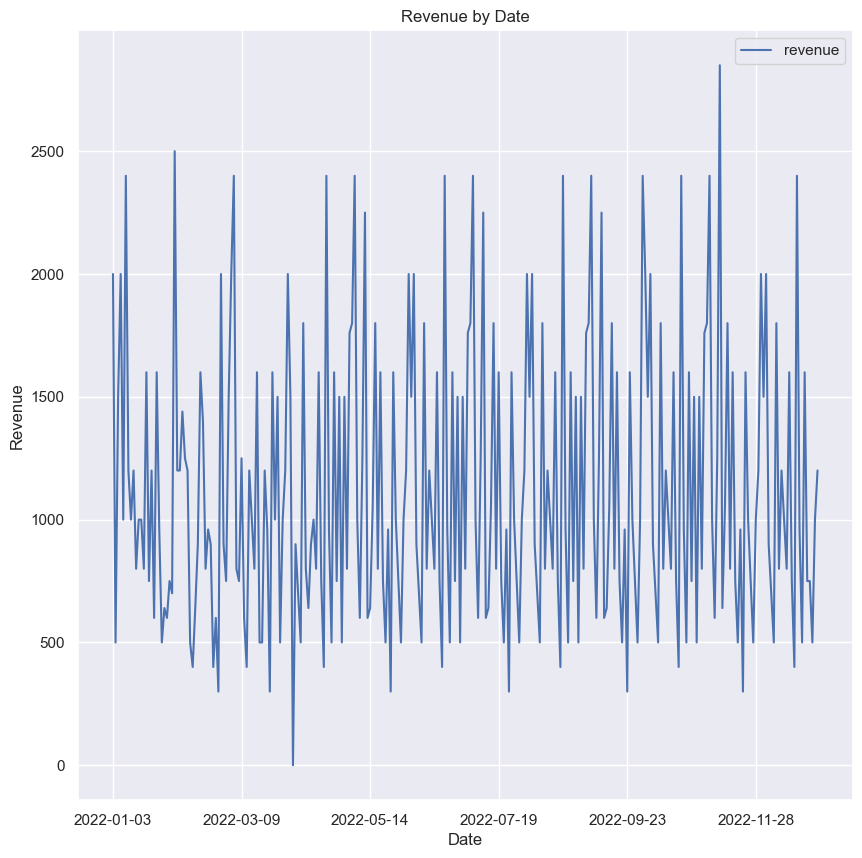

In [210]:
grouped_data = data.groupby(by=['date'])[['revenue']].agg('sum').reset_index()

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the data
grouped_data.plot(x='date', y='revenue', kind='line', ax=plt.gca())

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue by Date')


# Show the plot
plt.show()

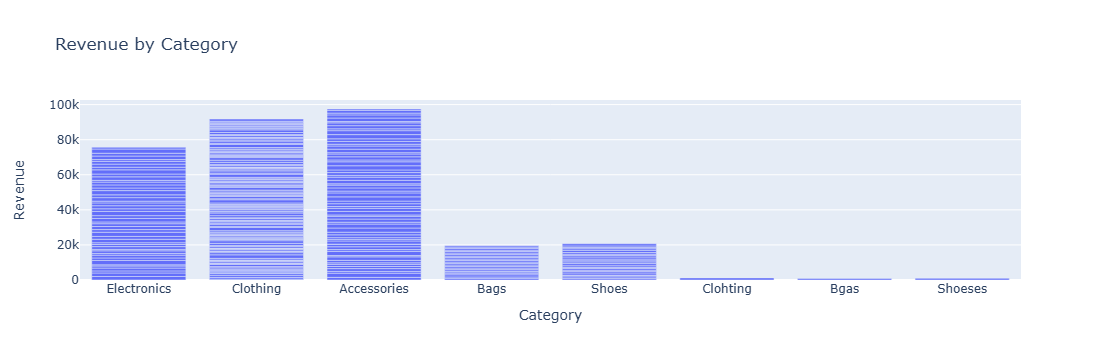

In [211]:
fig = plx.bar(data, x='category', y='revenue', title='Revenue by Category', 
             labels={'category': 'Category', 'revenue': 'Revenue'})

# Show the plot
fig.show()

In [212]:
d1=data.groupby(by=['product'])[['price','quantity']].agg(['sum','mean']).reset_index()
d1

product   price             quantity           
                   sum        mean      sum       mean
0     Backpack  1200.0   50.000000    408.0  17.000000
1         Coat  3500.0  100.000000    338.0   9.657143
2   Headphones  1300.0  100.000000    180.0  13.846154
3       Hoodie   960.0   40.000000    525.0  21.875000
4        Jeans  1200.0   50.000000    413.0  17.208333
5   Smartwatch  7200.0  200.000000    304.0   8.444444
6     Sneakers  1920.0   80.000000    270.0  11.250000
7      Speaker  2000.0   80.000000    496.0  19.840000
8      T-Shirt   700.0   20.000000    875.0  25.000000
9       Tablet  3600.0  400.000000     45.0   5.000000
10      Wallet   150.0   25.000000    200.0  33.333333
11       Watch  3150.0  143.181818    218.0   9.909091

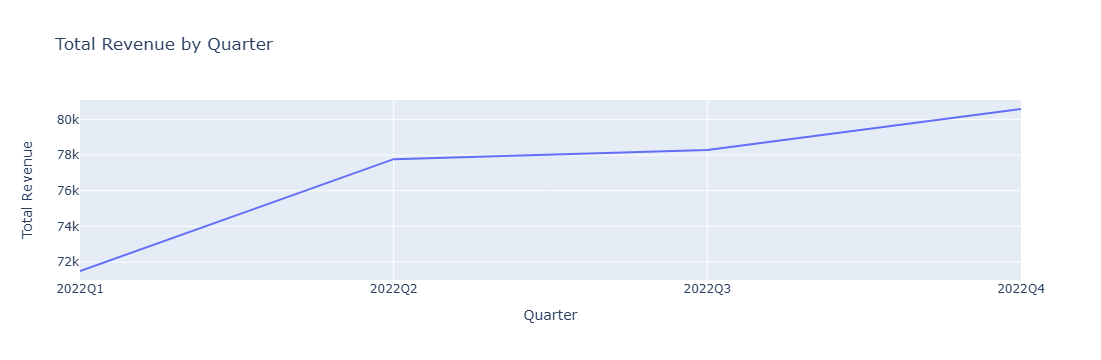

In [213]:


# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Group by quarters and calculate total revenue
data['quarter'] = data['date'].dt.to_period('Q')
quarterly_revenue = data.groupby('quarter')['revenue'].sum().reset_index()

# Convert quarter to string for display purposes
quarterly_revenue['quarter'] = quarterly_revenue['quarter'].astype(str)

# Plotting using Plotly Express
fig = plx.line(quarterly_revenue, x='quarter', y='revenue', title='Total Revenue by Quarter',
              labels={'quarter': 'Quarter', 'revenue': 'Total Revenue'})

# Show the plot
fig.show()


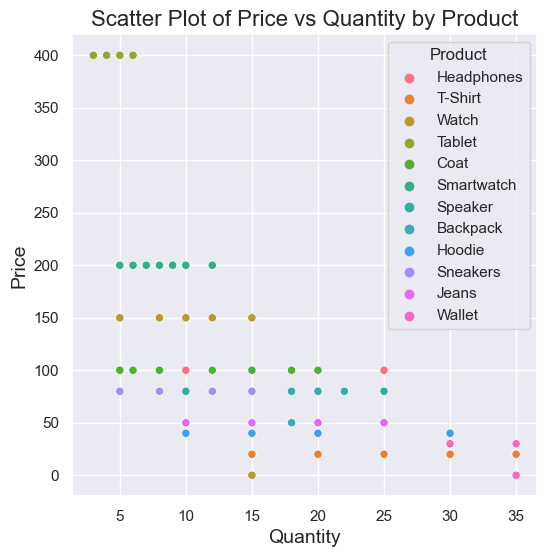

In [214]:
plt.figure(figsize=(6, 6))

# Use Seaborn scatterplot
sns.scatterplot(x='quantity', y='price', data=data, hue='product')

# Adjust title and axis labels
plt.title('Scatter Plot of Price vs Quantity by Product', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Product')